In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import math
import seaborn as sns
%matplotlib inline

In [2]:
data=load_breast_cancer()

In [3]:
features=pd.DataFrame(data.data,columns=data.feature_names)
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
target=pd.DataFrame(data.target,columns=['target'])
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
xscaler=StandardScaler()
X=xscaler.fit_transform(features)
y=np.array(target)

In [6]:
import umap

KeyboardInterrupt: 

In [ ]:
reducer = umap.UMAP()
embedding=reducer.fit_transform(features)

In [ ]:
plt.scatter(embedding[:, 0],embedding[:, 1],c=y)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2,perplexity=50).fit_transform(features)
plt.scatter(embedding[:, 0],embedding[:, 1],c=y)
plt.show()

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
Xpca=pca.transform(X)

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(Xpca,y,random_state=42)

In [12]:
prob_1=(y == 1).sum()/len(ytrain)
prob_0=(y == 0).sum()/len(ytrain)
prob_1,prob_0,np.unique(y,return_counts = True)

(0.8380281690140845,
 0.49765258215962443,
 (array([0, 1]), array([212, 357], dtype=int64)))

In [15]:
Xpose=xtrain.T

array([[-4.31212958e+00,  2.22699449e+00, -2.00138847e+00,
         3.24541365e+00,  4.80896924e+00, -3.90018981e-01,
        -3.45471837e+00, -6.74619286e-01, -3.64725775e+00,
        -4.58193667e+00, -1.96495011e+00, -4.01914024e+00,
         1.30561219e+01,  3.79556564e+00, -5.47524330e+00,
        -2.19498430e+00, -4.65908518e+00, -5.56573590e+00,
        -1.93896950e+00, -3.88906553e+00, -9.82648581e-01,
        -9.34090810e-01, -1.28318715e+00, -3.26127947e+00,
        -1.30092971e+00,  1.17089778e+00,  2.79039983e+00,
         1.02590079e+00, -3.04992494e+00, -2.20251552e+00,
         1.98846211e+00, -2.81903851e+00, -1.92767819e+00,
        -8.40209654e-01, -3.89578090e-01, -2.70839397e+00,
        -1.17383065e+00, -6.19838740e-01, -2.93118706e+00,
        -2.51011768e+00,  1.34502044e+00,  3.71570510e+00,
         2.14329850e+00,  1.01171250e+00, -1.23706336e+00,
         2.81936834e+00, -1.35085730e+00,  4.64873887e+00,
        -2.55325841e+00, -1.45533052e+00, -4.69492345e+0

In [14]:
#training
mean0=[]
mean1=[]
var0=[]
var1=[]
for i in Xpose:
    print(i)
    x0=i[np.where(ytrain==0)[0]]
    x1=i[np.where(ytrain==1)[0]]
    mean0.append(np.mean(x0))
    mean1.append(np.mean(x1))
    var0.append(np.var(x0))
    var1.append(np.var(x1))
    break

[-4.31212958  2.22699449 -2.00138847  3.24541365  4.80896924 -0.39001898
 -3.45471837 -0.67461929 -3.64725775 -4.58193667 -1.96495011 -4.01914024
 13.05612186  3.79556564 -5.4752433  -2.1949843  -4.65908518 -5.5657359
 -1.9389695  -3.88906553 -0.98264858 -0.93409081 -1.28318715 -3.26127947
 -1.30092971  1.17089778  2.79039983  1.02590079 -3.04992494 -2.20251552
  1.98846211 -2.81903851 -1.92767819 -0.84020965 -0.38957809 -2.70839397
 -1.17383065 -0.61983874 -2.93118706 -2.51011768  1.34502044  3.7157051
  2.1432985   1.0117125  -1.23706336  2.81936834 -1.3508573   4.64873887
 -2.55325841 -1.45533052 -4.69492345 -3.0036058   0.01743079 -1.567479
 -4.03660736  7.09856285 -3.78509923 -3.29984201 -1.14283186  9.08799968
 -2.61494831  4.96026812  4.94358101 -3.05703264 -3.36796578 -0.96917281
 -0.6388805  -2.67787072 -3.50220104 -1.25692841 -4.65872958  2.9022361
 -1.34894868 -2.88726806 -3.4839863  -3.28834959 -4.02662025  2.17686288
 -1.47491994  4.94963207  4.41801092 -2.28434025 -2.7859

In [224]:
#testing
pred=[]
for i in xtest:
    prob1=[]
    prob0=[]
    for j in range(len(i)):
        pro1=np.exp(-((i[j]-mean1[j])**2)/(2*var1[j])) / np.sqrt(2*np.pi*var1[j])
        pro0=np.exp(-((i[j]-mean0[j])**2)/(2*var0[j])) / np.sqrt(2*np.pi*var0[j])
        prob1.append(pro1)
        prob0.append(pro0)
    one=prob_1*np.product(prob1)
    zero=prob_0*np.product(prob0)
    pred.append(np.argmax([zero,one]))

In [225]:
accuracy_score(ytest,pred)

0.9370629370629371

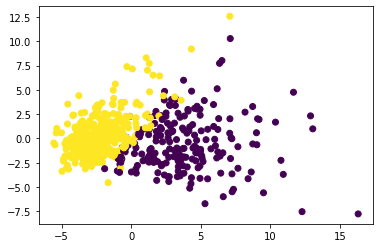

In [230]:
plt.scatter(Xpca[:,0],Xpca[:,1],c=y)

In [231]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(xtrain, ytrain)

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [234]:
ypred=logisticRegr.predict(xtest)

In [235]:
accuracy_score(ypred,ytest)

0.9790209790209791

In [239]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)
accuracy_score(ypred,ytest)

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9790209790209791

In [242]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)

C:\Users\Bhagwan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.965034965034965